# Chapter 6 - Exercise 1
### Author: *John Benedick Estrada*
---
**Exercise:** Start GoL in a random state and run it until it stabilizes. What stable patterns can you identify?

##### My implementation of Conway's Game of Life

In [1]:
from Cell2D import Cell2D
from scipy.signal import correlate2d
import numpy as np

### Code obtained from the book and the provided Jupyter notebook

In [2]:
class Life(Cell2D):
    """Implementation of Conway's Game of Life."""
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1

    def step(self):
        """Executes one time step."""
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]

In [3]:
def make_life(n, m, row, col, *strings):
    """Makes a Life object.
    
    n, m: rows and columns of the Life array
    row, col: upper left coordinate of the cells to be added
    strings: list of strings of '0' and '1'
    """
    life = Life(n, m)
    life.add_cells(row, col, *strings)
    return life

### Random State

In [4]:
def make_rand_state_life(n, m):
    # Generate a list of random bit string.
    init_state = ["".join(["0" if np.random.random() > 0.5 else "1" for _ in range(m)]) for _ in range(n)]

    return make_life(n, m, 0, 0, *init_state)

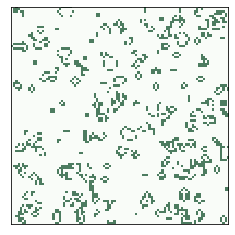

In [5]:
life = make_rand_state_life(100, 100)
life.draw()

life.animate(1000)